# Part I - ( Prosper Loan Dataset Exploration)
## by (Fridah Arasa)

## Introduction
> This financial dataset includes information about loans, borrowers, lenders, interest rates, and other relevant topics. A company called Prosper, also known as Prosper Marketplace Inc., is situated in San Francisco, California and specializes in giving customers loans with low interest rates. We are analyzing this dataset using data from Prosper and looking for patterns in the Prosper data.The 113,937 loans in this data set have an average of 81 variables, such as loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower income range, total prosper loans borrowed by an individual, loan original amount, recommendations and investors. Basically this data set has information of clients and their characteristics which are the 81 variables. Attached is a link to the defination of its variables, https://docs.google.com/spreadsheets/d/1_1xH72OrKQWyxNdowMFMEpUNwEjRoYm5kXA0Ijv1vcc/edit#gid=0   


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset into pandas dataframe.
prosper = pd.read_csv('prosperLoanData.csv')

In [3]:
with pd.option_context("display.max_columns", None):
    display(prosper)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.0906

##### Due to the large number of variables, only a few variables will be selected, the only the variables I will be working on and also unique variables to each individual such as ListingKey, ListingNumber, GroupKey, LoanKey, and MemberKey.

In [4]:
prosperloan = prosper[['ListingKey', 'ListingNumber', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerRate', 'Occupation', 'EmploymentStatus', 'IncomeRange', 'LoanOriginalAmount', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'Investors', 'InvestmentFromFriendsAmount', 'MonthlyLoanPayment', 'GroupKey', 'LoanKey', 'MemberKey', 'IncomeVerifiable']]

In [5]:
# Overview of the structure of the dataset, starting with the data shape.
print(prosperloan.shape)

(113937, 19)


In [6]:
# Overview of the structure of the dataset, using the dtype function.
print(prosperloan.dtypes)

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
Term                             int64
LoanStatus                      object
BorrowerRate                   float64
Occupation                      object
EmploymentStatus                object
IncomeRange                     object
LoanOriginalAmount               int64
IsBorrowerHomeowner               bool
CurrentlyInGroup                  bool
Investors                        int64
InvestmentFromFriendsAmount    float64
MonthlyLoanPayment             float64
GroupKey                        object
LoanKey                         object
MemberKey                       object
IncomeVerifiable                  bool
dtype: object


In [7]:
# Overview of the structure of the dataset, using the head function.
prosperloan.head(5)

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerRate,Occupation,EmploymentStatus,IncomeRange,LoanOriginalAmount,IsBorrowerHomeowner,CurrentlyInGroup,Investors,InvestmentFromFriendsAmount,MonthlyLoanPayment,GroupKey,LoanKey,MemberKey,IncomeVerifiable
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.1580,Other,Self-employed,"$25,000-49,999",9425,True,True,258,0.0,330.43,NaN,E33A3400205839220442E84,1F3E3376408759268057EDA,True
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.0920,Professional,Employed,"$50,000-74,999",10000,False,False,1,0.0,318.93,NaN,9E3B37071505919926B1D82,1D13370546739025387B2F4,True
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,0.2750,Other,Not available,Not displayed,3001,False,True,41,0.0,123.32,783C3371218786870A73D20,6954337960046817851BCB2,5F7033715035555618FA612,True
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.0974,Skilled Labor,Employed,"$25,000-49,999",10000,True,False,158,0.0,321.45,NaN,A0393664465886295619C51,9ADE356069835475068C6D2,True
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.2085,Executive,Employed,"$100,000+",15000,True,False,20,0.0,563.97,NaN,A180369302188889200689E,36CE356043264555721F06C,True


#### From the above findings, the variables, ListingNumber and Occupation which is supposed to be an object is in integer form. There's need to change it.  

In [8]:
# Converting the data type of the ListingNumber variable from integer to a string.
prosperloan['ListingNumber']= prosperloan['ListingNumber'].values.astype(str)
prosperloan['Occupation']= prosperloan['Occupation'].values.astype(str)

In [9]:
# Investigating whether the ListingNumber variable data type has changed from integer to string.
print(prosperloan.dtypes)

ListingKey                      object
ListingNumber                   object
ListingCreationDate             object
Term                             int64
LoanStatus                      object
BorrowerRate                   float64
Occupation                      object
EmploymentStatus                object
IncomeRange                     object
LoanOriginalAmount               int64
IsBorrowerHomeowner               bool
CurrentlyInGroup                  bool
Investors                        int64
InvestmentFromFriendsAmount    float64
MonthlyLoanPayment             float64
GroupKey                        object
LoanKey                         object
MemberKey                       object
IncomeVerifiable                  bool
dtype: object


### What is the structure of your dataset?

> There are 113,937 entries in the dataframe with 81 features/variables. The variables are a mixture of both qualitatve and quantitative variables. Some of the variables of the dataset are, ListingNumber, LoanStatus, BorrowerRate, etc. These are variables associated when one is borrowing a loan from a financial institution. Since I will not be using all the variables given in the dataset for the analysis, a selection of 19 variables was made which will be used throughout the analysis.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding out how different factors influence an individual to borrow a loan and to what extent.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features in the dataset  that will support my investigation into the features of interest are, income range, loan original amount, employment status, employement status duration, whether the borrower is a homeowner or not, occupation, borrower state, borrower rate, term(the length of the loan expressed in months), and the loan status.
 

## Univariate Exploration



### Starting with a look at the distribution of the main variables of interest.

##### Investigating the occupations with the highest and lowest number of borrowers.

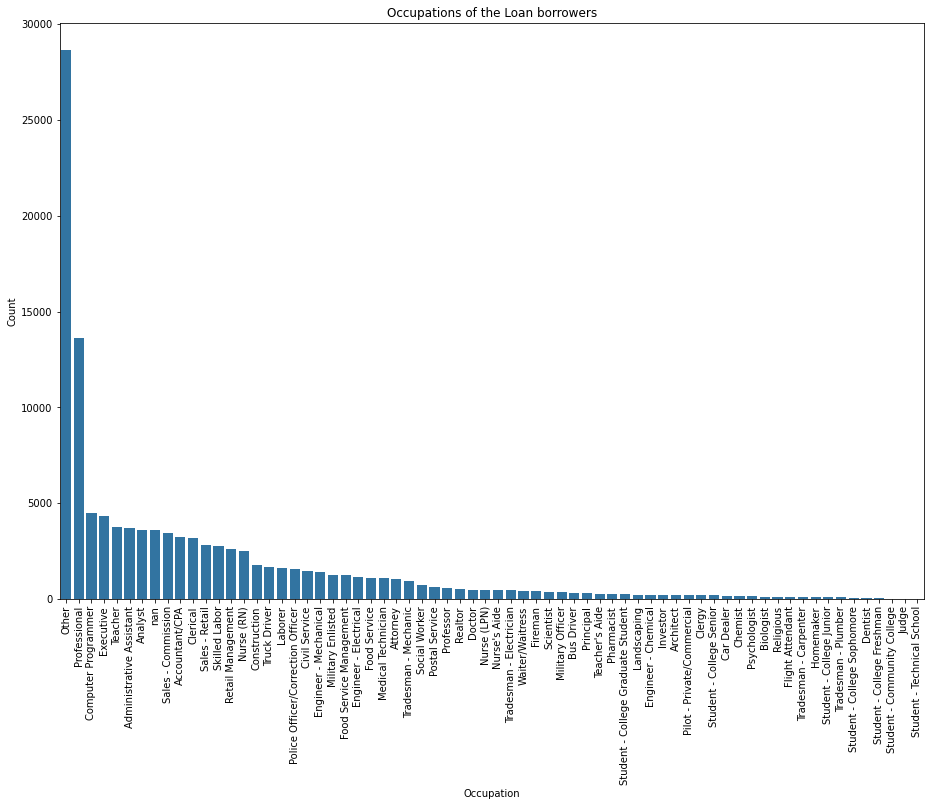

In [10]:
# Looking at the occupations of the individuals who were borrowing the loan.
# Plotting a barchart to visualize this.
fig = plt.figure()
ax = fig.add_axes([ 1, 1, 2,2])
basic_color = sb.color_palette()[0]
occ_order = prosperloan['Occupation'].value_counts().index
sb.countplot(data = prosperloan, x = 'Occupation',color=basic_color, order = occ_order, ax = ax);
plt.xticks(rotation=90);
plt.title('Occupations of the Loan borrowers');
plt.xlabel('Occupation');
plt.ylabel('Count');

##### From the above bar chart, it's clear that individuals from other occupations are the most in terms of borrowing the loans, with a count of almost 28000. This is followed by professionals, computer programmers, executives, teachers, administrative assistants, analysts, nans, sales commission and accountants. These are the top ten occupations that have the highest number of borrowers. Students from technical school, judges, students from community college, college freshman, dentists, and students from college in their sophomore year were the occupations with the least number of borrowers.

#### What is the employment status of the borrowers?

In [11]:
def count_plot(df,x,title,xlabel,ylabel, order):
    
    
    basic_color = sb.color_palette()[0]
    status_order = order.value_counts().index
    sb.countplot(data=df, x=x, color=basic_color, order=status_order);
    plt.xticks(rotation=90);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
   

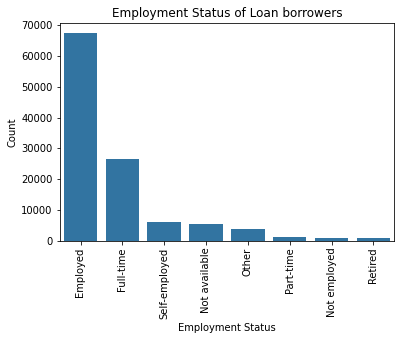

In [12]:
count_plot(prosperloan, 'EmploymentStatus', 'Employment Status of Loan borrowers', 'Employment Status', 'Count',prosperloan['EmploymentStatus'])

##### From the above bar chart, the borrowers were comprised of different categories of employment status, and these categories are employed, those employed full-time, self-employed, not available to work, part-time employees, retired and others. The employed comprised a majority of the borrowers, followed by the those employed full-time and the least were those employed part-time, not employed and retired.

#### What is the loan status of the borrowers?

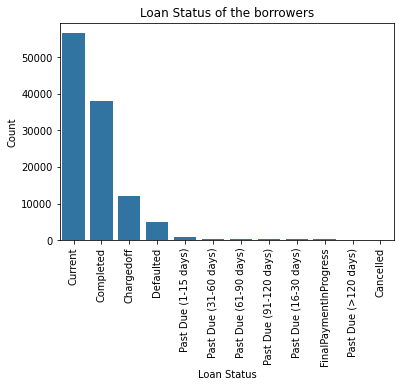

In [13]:
count_plot(prosperloan, 'LoanStatus','Loan Status of the borrowers', 'Loan Status', 'Count',prosperloan['LoanStatus'])

##### The list comprised borrowers who were in different stages of their loans. These stages entailed, those who are current loan borrowers, who had completed, chargedoff, defaulted, those whose loans were past due (1-15),(16-30),(31-60),(91-120), (>120) days, those in their final payments and those whose loans had been cancelled.

#### What is the income range of the loan borrowers?

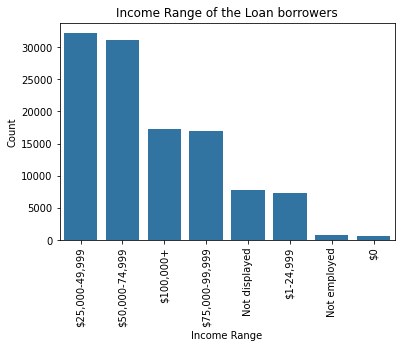

In [14]:
count_plot(prosperloan,'IncomeRange', 'Income Range of the Loan borrowers', 'Income Range', 'Count',prosperloan['IncomeRange'])

##### The highest number of borrowers had an income range of $ 25,000-49,999, followed by $50,000-74,999. Borrowers with an income range between $75,000-99,999 and $100,000+ had the same number of borrowers. An the least among the borrowers were those who are not employed and those whose income is $0.

####  What is the distribution of the original loan amount?

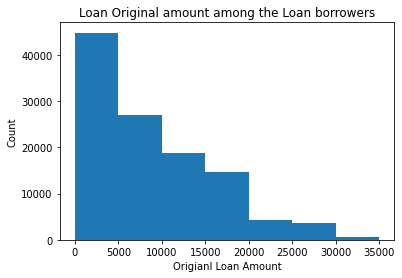

In [15]:
# Investigating the original loan amount distribution in the dataset.
# bins parameters
bins = np.arange(0,prosperloan['LoanOriginalAmount'].max()+5000,5000)
plt.hist(data = prosperloan, x= 'LoanOriginalAmount', bins = bins);
plt.title('Loan Original amount among the Loan borrowers');
plt.xlabel('Origianl Loan Amount');
plt.ylabel('Count');

##### The distribution of the original loan amount is skewed to the right, meaning most values range from $0-$25,000. This shows that most of the borrowers had an original loan amount ranging from $0-$ 25,000.

#### What was the homeownership status of the borrowers at the time of borrowing?

In [16]:
# Investigating the home ownership status duration among the borrowers at that particular time.
def counts(col):     #Creating the counts function to be used.
    values = col.value_counts()
    return values 

In [17]:
home_status = counts(prosperloan['IsBorrowerHomeowner']) # Exploring the home ownership status of the borrowers.
home_status

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [18]:
def pie(values, title):    # Creating the pie function to be used in the subsequent questions.
    labels = ['True','False']
    explode = (0,0.1)
    fig1, ax1 = plt.subplots()
    ax1.pie(values, explode = explode, labels=labels,autopct = '%1.1f%%',shadow=True, startangle=90)
    plt.title(title); 

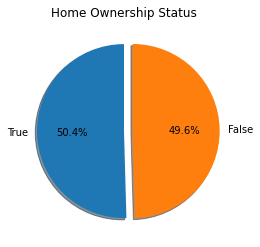

In [19]:
pie(home_status,'Home Ownership Status')

##### From the pie chart above, it's clear that most borrowers were homeowners at the time. The percaentage number of homeowners was 50.4% and that of non-homeowners was 49.6%. 

#### What was the percentage of borrowers who were  associated to a group?

In [20]:
# Investigating whether the borrowers were in a group when the list was created.
group_status = counts(prosperloan['CurrentlyInGroup'])
group_status

False    101218
True      12719
Name: CurrentlyInGroup, dtype: int64

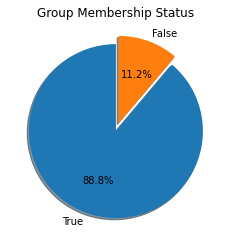

In [21]:
pie(group_status,'Group Membership Status')

##### From the above pie chart, 88.8% of borrowers had group memberships and 11.2% were not in any group at the time.

#### What was the distribution of loan term in the dataset?

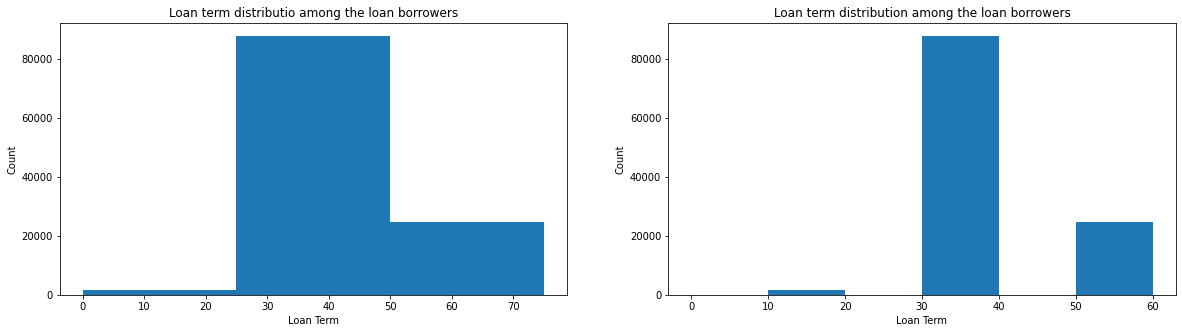

In [22]:
# Investigating the distribution of the loan term in the dataframe.
# Plotting 2 figures side by side with different bin sizes.
plt.figure(figsize = [20, 5]) 

# histogram on left(large bin sizes)
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, prosperloan['Term'].max()+25, 25)
plt.hist(data = prosperloan, x = 'Term', bins = bins);
plt.title('Loan term distributio among the loan borrowers');
plt.xlabel('Loan Term');
plt.ylabel('Count');

# histogram on right(small bin sizes)
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, prosperloan['Term'].max()+10, 10)
plt.hist(data = prosperloan, x = 'Term', bins = bins);
plt.title('Loan term distribution among the loan borrowers');
plt.xlabel('Loan Term');
plt.ylabel('Count');

##### The distribution of the loan term is skewed to the right as a result of lower data boundary to this side. 

## Bivariate Exploration

#### Relationship between the Original loan amount and the term of the loan.

In [23]:
# Scatterplot function.
def regplot(df, xlabel,ylabel,title,x_jitter, scatter_kws):
    sb.regplot(data=df, x=xlabel, y=ylabel,x_jitter=x_jitter, scatter_kws= scatter_kws);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    base_color=sb.color_palette()[0]


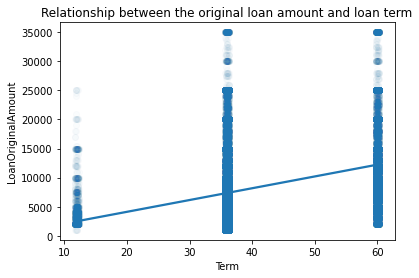

In [24]:
# Investigating the relationship between the original loan amount and the term length of the loan.
# Applying jitter and transparency.
regplot(prosperloan,'Term','LoanOriginalAmount','Relationship between the original loan amount and loan term',0.3,{'alpha':1/50})

##### The relationship between the original loan amount and the loan term is positive. This means that as the original loan amount increases the loan term also does the same.

#### Relationship between borrower rate and original loan amount.

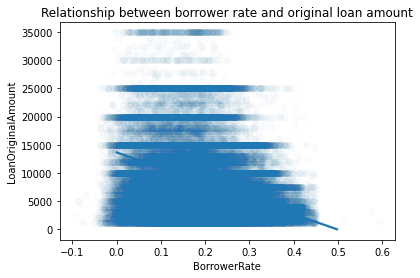

In [25]:
# Investigating the relationship between original loan amount and borrower rate.
# Applying jitter and transparency.
regplot(prosperloan,'BorrowerRate','LoanOriginalAmount','Relationship between borrower rate and original loan amount',0.1,{'alpha':1/50})

##### There is a negative correlationship between the borrower rate and the orignal loan amount. This means that as the borrower rate increases, the original loan amount decreases.

#### Investigating the relationship between the loan original amount and employment status.

In [41]:
# Violinplot function.
base_color = sb.color_palette()[0]
def violin(df,xlabel,ylabel,title):  
    sb.violinplot(data=df , x=xlabel, y=ylabel, color = base_color,inner=None);
    plt.xticks(rotation=90);
    plt.title(title)
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);

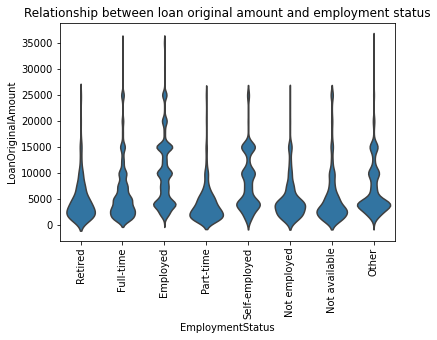

In [42]:
# Relationship between loan original amount and employment status.
violin(prosperloan,'EmploymentStatus','LoanOriginalAmount','Relationship between loan original amount and employment status')

##### The retired, part-time, not employed, other and those not available have the lowest original loan amount. The long tail among those with other status, full-time and employed suggest outliers with the highest original loan amount.

#### Investigating the relationship between employment status and term(period of the loan amount in months)

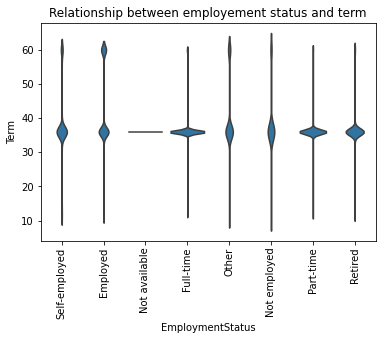

In [28]:
# Relationship between the term period  and employment status.
violin(prosperloan,'EmploymentStatus','Term','Relationship between employement status and term')

##### The employment status of all the borrowers had a loan term that ranges between 30 to 40. However, those with employed status had two term that is the one that falls between 30-40 and 60.

#### Investigating the relationship between loan original amount and homeownership.


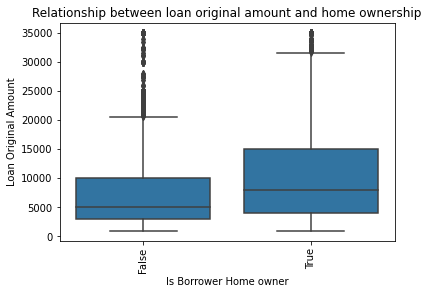

In [43]:
# Relationship between the loan original amount and occupation.
base_color = sb.color_palette()[0]
sb.boxplot(data=prosperloan, x= 'IsBorrowerHomeowner', y='LoanOriginalAmount',color =  base_color);
plt.xticks(rotation=90);
plt.title('Relationship between loan original amount and home ownership');
plt.xlabel('Is Borrower Home owner');
plt. ylabel('Loan Original Amount');

##### Borrowers who are homeowners have the highest mean, and median in terms of the original loan amount compared to those who are not homeowners.

#### Investigating the relationship between employment status and homeownership.

In [30]:
# Relationship between employment status and homeownership.
# Employment status levels. 
counts(prosperloan['EmploymentStatus'])

# Employment class status.
employment_class = ['Retired','Full-time', 'Employed', 'Part-time', 'Self-employed', 'Not employed', 'Not available', 'Other']

# Returning  the types for employment_class with the categories and orderedness
eclass = pd.api.types.CategoricalDtype(ordered=True, categories=employment_class)


 #Use pandas.astype() to convert the "EmploymentStatus" column from a plain object type into an ordered categorical type 
prosperloan['EmploymentStatus'] = prosperloan['EmploymentStatus'].astype(eclass);



In [44]:
# Count plot function.
def countplot(df,xlabel,hue,title,ylabel):
    sb.countplot(data = df, x = xlabel, hue = hue)
    plt.xticks(rotation=90);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);

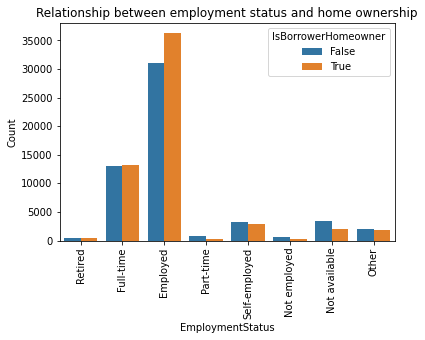

In [32]:
# Relationship between employment status and home ownership
countplot(prosperloan,'EmploymentStatus', 'IsBorrowerHomeowner','Relationship between employment status and home ownership','Count')

##### In the employement status variable, majority of the borrowers are those who are employed, followed by those who are employed full time, self-employed, those not available, other, part-time, not employed and the retired. Among the employed, and  full-time employed, majority of them are home owners. Majority of those who have part-time employment, self-employed, not employed, not available, and other are not home owners. The retired seem to have the same number of those who are homeowners and not homeowners. 

#### Investigating the relationship between employment status and group affliation status.

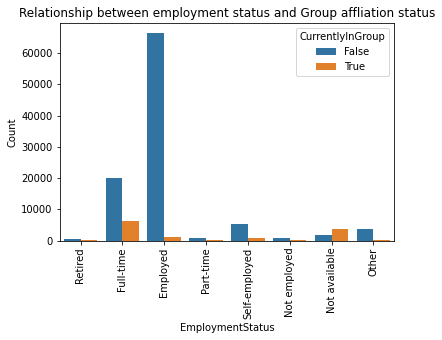

In [33]:
# Relationship between employment status and group affliation status.
countplot(prosperloan,'EmploymentStatus','CurrentlyInGroup', 'Relationship between employment status and Group affliation status', 'Count')

##### Majority of the employed, those employed full time, self-employed, not employed, other and retired were not affliated to any group at the time of borrowing the loan. Majority of those who were not available for work were affliated to a group at the time of borrowing the loan.

#### Investigating the relationship between borrower rate, loan original amount, term, investors, investment from friends, and monthly loan payment.

In [34]:
# Investigating the relationship between the variables listed below.
df = prosperloan[['BorrowerRate', 'LoanOriginalAmount', 'Term','Investors','InvestmentFromFriendsAmount','MonthlyLoanPayment']] 
# Finding the relationship between these variables.
corr_matrix = df.corr()
corr_matrix

,BorrowerRate,LoanOriginalAmount,Term,Investors,InvestmentFromFriendsAmount,MonthlyLoanPayment
BorrowerRate,1.000000,-0.328960,0.020085,-0.274217,-0.026512,-0.244742
LoanOriginalAmount,-0.328960,1.000000,0.338927,0.380093,0.020351,0.931984
Term,0.020085,0.338927,1.000000,-0.045137,-0.024472,0.091026
Investors,-0.274217,0.380093,-0.045137,1.000000,0.012178,0.387409
InvestmentFromFriendsAmount,-0.026512,0.020351,-0.024472,0.012178,1.000000,0.026684
MonthlyLoanPayment,-0.244742,0.931984,0.091026,0.387409,0.026684,1.000000


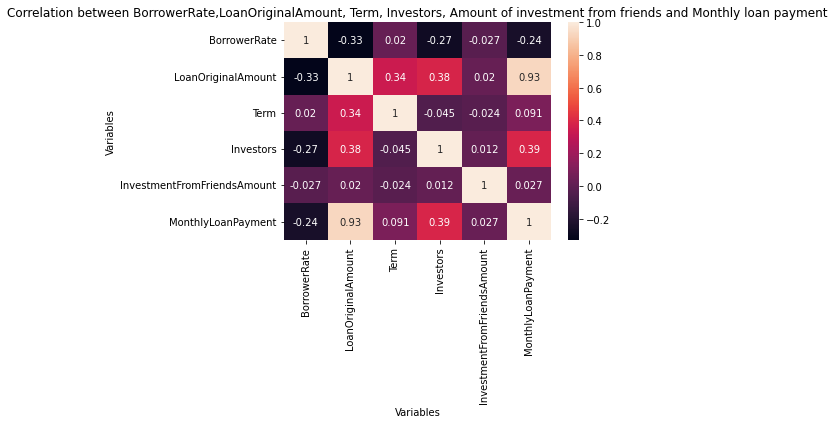

In [35]:
# Plotting the relationship between the variables listed above.
sb.heatmap(corr_matrix, annot= True )
plt.title('Correlation between BorrowerRate,LoanOriginalAmount, Term, Investors, Amount of investment from friends and Monthly loan payment');
plt.xlabel('Variables');
plt.ylabel('Variables');

##### There is a positive correlationship between the investors, investment from friends, term, loan original amount and monthly loan payment. However there is a negative correlationship between monthly loan payment, loan original amount, investment from friends amount and borrower rate.There is a strong correlationship between loan original amount and monthly loan payment of 0.93. This indicates that the loan original amount influences the monthly loan that will be repaid.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  The relationship between the original loan amount and the loan term is positive. This means that as the original loan amount increases the loan term also does the same. There is a negative cor-relationship between the borrower rate and the orignal loan amount. This means that as the borrower rate increases, the original loan amount decreases. Majority of the employed, those employed full time, self-employed, not employed, other and retired were not affliated to any group at the time of borrowing the loan. Majority of those who were not available for work were affliated to a group at the time of borrowing the loan.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a positive correlationship between the investors, investment from friends, term, loan original amount and monthly loan payment. However there is a negative correlationship between monthly loan payment, loan original amount, investment from friends amount and borrower rate.There is a strong correlationship between loan original amount and monthly loan payment of 0.93. This indicates that the loan original amount influences the monthly loan that will be repaid.

## Multivariate Exploration


#### Investigating the effect of home ownership in the relationship between loan original amount and borrower rate.

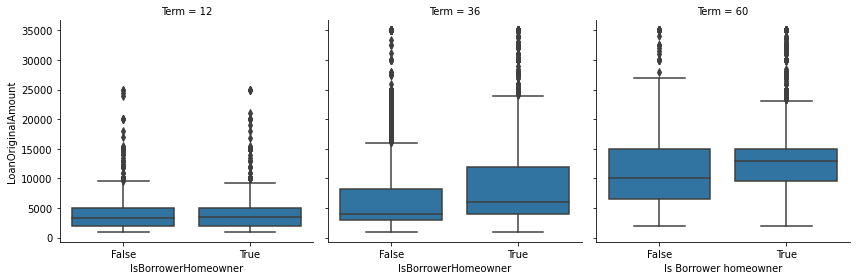

In [36]:
g = sb.FacetGrid(data = prosperloan, col = 'Term', size = 4);
g.map(sb.boxplot, 'IsBorrowerHomeowner', 'LoanOriginalAmount');
plt.xlabel('Is Borrower homeowner');
plt.ylabel('Loan Original Amount');

##### From the multivariate figure above showing the relationship between loan original amount and if the borrower is a homeowner or not, in relation to the terms of the loan, the longest term which has 60 months seems to have a larger effect compared to the other terms because it's median, first and third quartile are larger compared to those of the other terms.

##### 

#### Investigating the influence of income verifiability has on the borrower rate and loan original amount.

In [37]:
# Developing a function to avoid code repetition.
def scatter(df,x,y,s,title,xlabel,ylabel):    
    plt.scatter(data = df, x = x, y = y, s = s)

    # dummy series for adding legend
    sizes = [30, 45, 60]
    base_color = sb.color_palette()[0]
    legend_obj = []
    for s in sizes:
        legend_obj.append(plt.scatter([], [], s = s, color = base_color))
    plt.legend(legend_obj, sizes);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
   

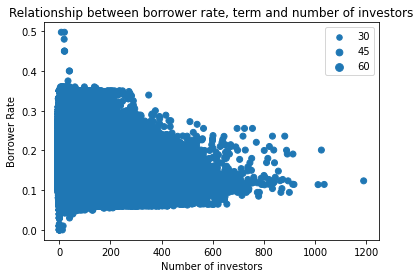

In [38]:
scatter(prosperloan,'Investors','BorrowerRate', 'Term','Relationship between borrower rate, term and number of investors','Number of investors', 'Borrower Rate')

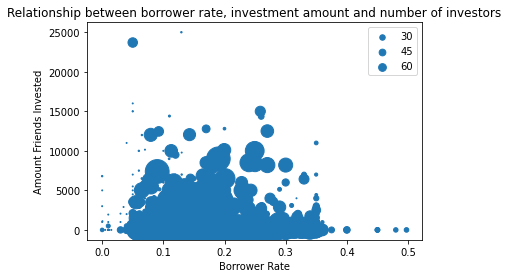

In [39]:
scatter(prosperloan,'BorrowerRate', 'InvestmentFromFriendsAmount','Investors','Relationship between borrower rate, investment amount and number of investors','Borrower Rate', 'Amount Friends Invested')

##### The size encoding for the third numeric variable which is the number of investors, indicates  that its values are largest in the 'middle part' that is on the x-axis on the values ranging between 0.05 to 0.3 of the distribution of values, and smaller on the far left and right edges. This shows that majority of the investors invested where the borrower rate ranged between 0.05 to 0.3 and amount the friends invested ranging from 0-10,000.

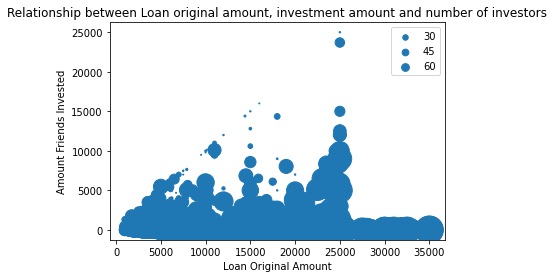

In [40]:
scatter(prosperloan,'LoanOriginalAmount','InvestmentFromFriendsAmount','Investors','Relationship between Loan original amount, investment amount and number of investors','Loan Original Amount','Amount Friends Invested')

##### The size encoding for the third numeric variable which is the number of investors, indicates  that its values are largest in the 'middle and lower part' of the distribution of values, and smaller on the upper edges. This shows that majority of the investors invested in the original loan amount that ranges from 5000 to 35000 and amount the friends invested ranging from 0-10,000.

##### 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The original loan amount had a great influence in the other variables investigated, for instance, majority of the investors invested in the original loan amount that ranged from $5,000-$35,000.

### Were there any interesting or surprising interactions between features?

> There were interesting interactions that were observed between the variables, for instance, in the relationship between loan original amount and if the borrower is a homeowner or not, in relation to the terms of the loan, the longest term which had 60 months seemed to have a larger effect compared to the other terms because it's median, first and third quartile are larger compared to those of the other terms.

## Conclusions
> The main findings in this analysis is that different factors influence the amount of loan one takes and they include, whether the borrower is a home owner or not, the term of the loan, whether an individual is in a group or not, amount friends have invested, number of investors etc just to name a few. There are positive correlationships between the investors, investment from friends, term, loan original amount and monthly loan payment.Negative correlationships exist between monthly loan payment, loan original amount, investment from friends amount and borrower rate.The strongest correlationship that exists is the one between loan original amount and monthly loan payment of 0.93. This indicates that the loan original amount influences the monthly loan that will be repaid. In accordance to the employment status of the borrowers, majority of them were not members of any group at the time of borrowing the loan, these employment status include, the employed, those employed full time, self-employed, not employed, other and retired. Majority of those who were not available for work were affliated to a group at the time of borrowing the loan. Borrowers who were homeowners had the highest mean, and median in terms of the original loan amount compared to those who are not homeowners. The employment status of all the borrowers had a loan term that ranges between 30 to 40. However, those with employed status had two term that is the one that falls between 30-40 and 60.
